# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import numpy as np
import pandas as pd
from functools import reduce
import statistics as stats
from scipy import stats as st
from collections import Counter
import scipy.stats as st
import pylab as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [10]:
temp = pd.read_csv('../your-code/Temp_States.csv')



#### Print `temp`

In [13]:
temp    

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [14]:
temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [16]:
ny_data = temp[temp['State'] == 'New York']
ny_data

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [17]:
ny_data.mean()


/var/folders/sw/ywfjlc8d22902gxr8wwrsfnw0000gn/T/ipykernel_26961/1131518381.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ny_data.mean()


Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [22]:
above_15 = temp[temp['Temperature'] > 15]
resulta = above_15[['City', 'State']]



#### Now, return only the cities that have a temperature above 15 degress Celcius

In [23]:
resulta

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [26]:
below_15 = temp[temp['Temperature'] < 15]
resultb = below_15[['City', 'State']]
resultb

,City,State
1,Albany,New York
2,Buffalo,New York
4,Bridgeport,Connecticut


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [27]:
EDAtemp = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
EDAtemp


,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [29]:
employee = pd.read_csv('../your-code/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [30]:
employee.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

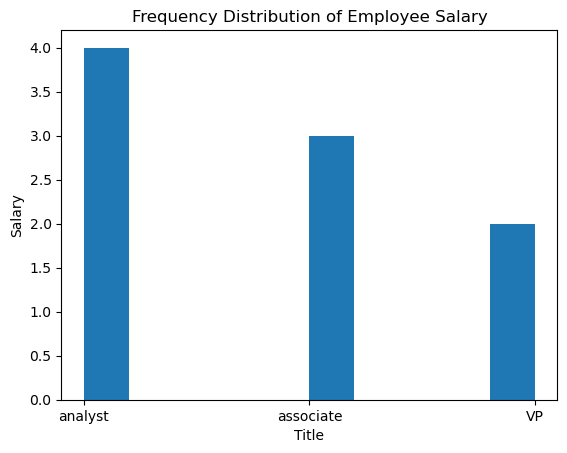

In [31]:
plt.hist(employee['Title'], bins=10)

plt.xlabel('Title')
plt.ylabel('Salary')
plt.title('Frequency Distribution of Employee Salary')

plt.show()

#### What's the average salary in this company?

In [32]:
employee.describe().T
#salario proedio = 48.88

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


#### What's the highest salary?

In [33]:
#El salario más alto es de 70.

#### What's the lowest salary?

In [15]:
#El salario más bajo es de 30.


#### Who are the employees with the lowest salary?

In [16]:
# your answer here

#### Could you give all the information about an employee called David?

In [17]:
# your answer here


#### Could you give only David's salary?

In [18]:
# your answer here


#### Print all the rows where job title is associate

In [19]:
# your answer here

#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [20]:
# your answer here- 1 method


In [21]:
# your answer here- 2nd method


#### Find the employees who's title is associate and the salary above 55?

In [22]:
# your answer here


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [25]:
# your answer here

####  What is the average Salary per title?

In [23]:
# your answer here

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [26]:
# draw boxplot here

In [27]:
# print first quartile here

In [28]:
# print third quartile here

#### Is the mean salary per gender different?

In [29]:
# your answer here

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here